<a href="https://colab.research.google.com/github/joshIsac/quantumcomputing/blob/main/2348523_Teleportation_protocol_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teleportation Protocol
The objective of this technique is to transmit one qubit between Alice and Bob by sending two classical bits. However, Alice and Bob must initially share one entangled state.

in simple it is process by which the quantum state of one particle can be transmitted to anpther particle at any distant location which is only achieved through entanglement

In [90]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.visualization import plot_histogram

In [91]:
#Using Numpy to illustrate how Alice transmits the qubits to Bob

#define the basis state 
zero= np.array([[1], [0]])
one= np.array([[0], [1]])


# define Hadamard ,Pauli-X and Pauli-Y
X=np.array(([0,1],[1,0]))
Z = np.array([[1, 0], [0, -1]])
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])

#psi for Qubit Q
alpha,beta=1/np.sqrt(2),1j/np.sqrt(2)
psi=alpha*zero+beta*one


#bell state 
bell_state=(np.kron(zero, zero) + np.kron(one, one)) / np.sqrt(2)

# Initial state: |ψ⟩ ⊗ |Φ+⟩
initial_state = np.kron(psi, bell_state)
print("Combined initial state |ψ⟩ ⊗ |Φ+⟩:\n", initial_state)


Combined initial state |ψ⟩ ⊗ |Φ+⟩:
 [[0.5+0.j ]
 [0. +0.j ]
 [0. +0.j ]
 [0.5+0.j ]
 [0. +0.5j]
 [0. +0.j ]
 [0. +0.j ]
 [0. +0.5j]]


In [92]:
# Define CNOT gate for Q -> A on a 3-qubit system
CNOT_QA = np.kron(np.array([[1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 0, 1],
                            [0, 0, 1, 0]]), np.eye(2))

# Define Hadamard gate for Q on a 3-qubit system
H_Q = np.kron(np.kron(H, np.eye(2)), np.eye(2))


# Apply CNOT(Q, A) and H(Q)
after_gates_state = H_Q @ CNOT_QA @ initial_state
print("State after CNOT(Q, A) and H(Q):\n", after_gates_state)

State after CNOT(Q, A) and H(Q):
 [[0.35355339+0.j        ]
 [0.        +0.35355339j]
 [0.        +0.35355339j]
 [0.35355339+0.j        ]
 [0.35355339+0.j        ]
 [0.        -0.35355339j]
 [0.        -0.35355339j]
 [0.35355339+0.j        ]]


Measurement results: {'00': 247, '11': 264, '01': 269, '10': 244}


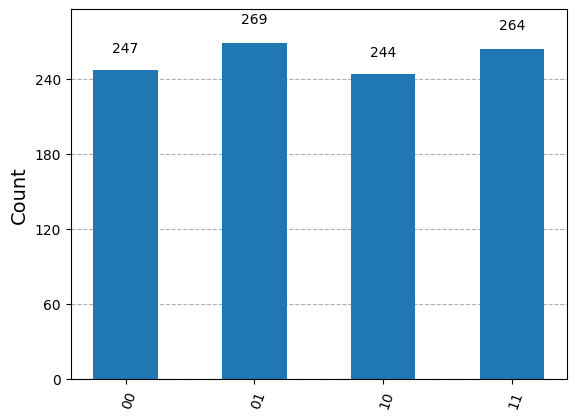

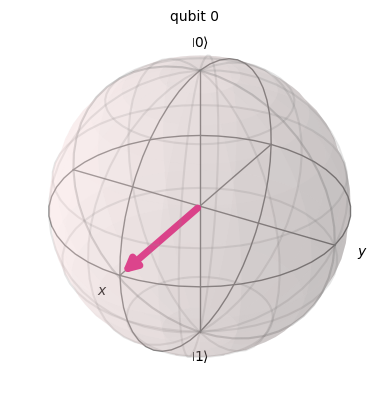

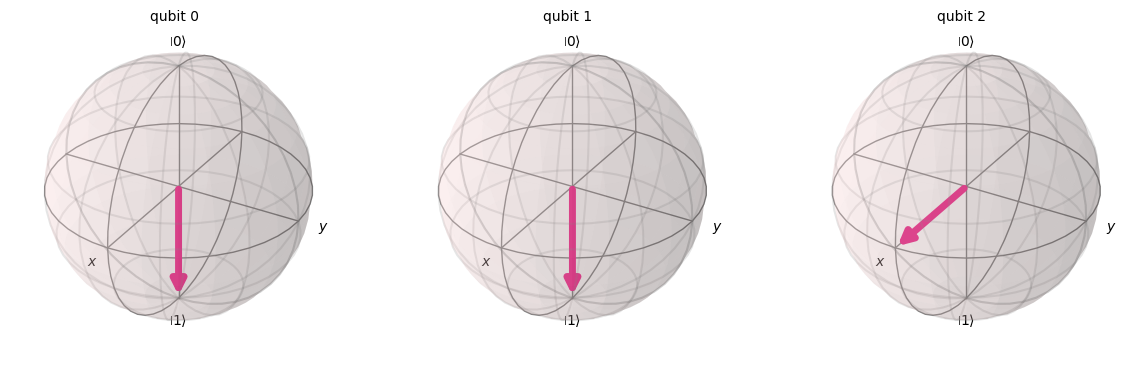





Initial State Vector on Qubit A: [0.7071067811865475, 0.7071067811865475]
Teleported State Vector on Qubit C: [0.        +0.00000000e+00j 0.70710678-8.65956056e-17j]




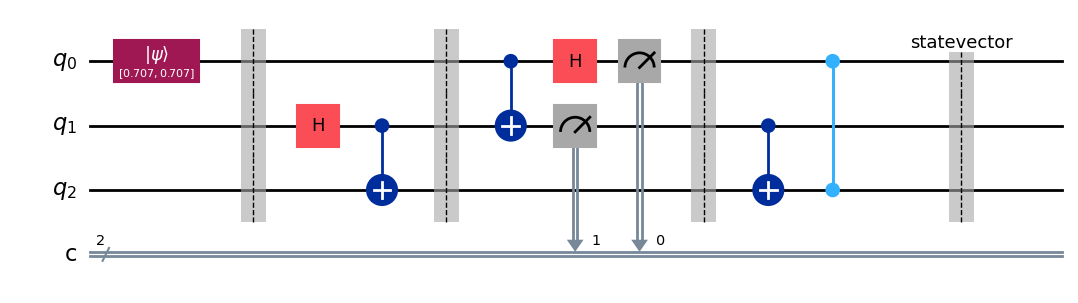

In [93]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
import matplotlib.pyplot as plt

# Define the quantum and classical registers
q = QuantumRegister(3, 'q')  # qubits A, B, C
c = ClassicalRegister(2, 'c')  # classical bits for Alice's measurement
qc = QuantumCircuit(q, c)


# arbitrary state on qubit A (the state to be teleported)
alpha = 1/np.sqrt(2)
beta = 1/np.sqrt(2)
qc.initialize([alpha, beta], 0)  # Initialize qubit A with state |ψ⟩ = α|0⟩ + β|1⟩
qc.barrier()

#entanglement between qubits B and C
qc.h(1)    # Hadamard on qubit B
qc.cx(1, 2)  # CNOT from B to C
qc.barrier()

#Perform Bell measurement on qubits A and B
qc.cx(0, 1)  # CNOT from A to B
qc.h(0)      # Hadamard on qubit A
qc.measure([0, 1], c)  # Measure qubits A and B
qc.barrier()

# Conditional operations on qubit C based on measurement results
qc.cx(1, 2)
qc.cz(0, 2)


qc.save_statevector()

# Simulate the circuit
simulator = AerSimulator(method="statevector")
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()
statevector_final = result.get_statevector(compiled_circuit)
counts = result.get_counts()



# Output the measurement results
print("Measurement results:", counts)


# display(qc.draw("mpl"))
# Plot the measurement results
display(plot_histogram(counts))


print("\n")

# Plot initial Bloch vector for the state |ψ⟩ prepared on qubit A
display(plot_bloch_multivector([alpha, beta]))

print("\n")
# Plot final Bloch vector for the teleported state on qubit C
display((plot_bloch_multivector(statevector_final)))

print("\n")
# Plot the measurement results as a histogram
plot_histogram(counts)
plt.show()


print("\n")
# Print the initial state vector of qubit A
print("Initial State Vector on Qubit A:", [alpha, beta])
# Print the final state vector of qubit C after teleportation
print("Teleported State Vector on Qubit C:", statevector_final.data[-2:])


print("\n")
display(qc.draw("mpl"))
